In [1]:
import pandas as pd
import os
import mne
import numpy as np
import seaborn as sns
import matplotlib.pyplot

In [2]:
df_list = []
fatigue_count = 0
normal_count = 0
total_count =0
for i in range(1,12):
    #f = open(str(i))
    filename = (f'Fatigue state{(i)}.cnt')
    f = mne.io.read_raw_cnt(filename)
    df_fatigue=f.to_data_frame()
    #df_fatigue.info()
    df_fatigue['fatigue']=1
    #df_fatigue.info()
    df_list.append(df_fatigue)
    fatigue_count +=1
    filename = (f'Normal state{(i)}.cnt')
    f = mne.io.read_raw_cnt(filename)
    df_normal = f.to_data_frame()
    df_normal['fatigue']=0
    df_normal
    df_list.append(df_normal)
    normal_count +=1
    
print(fatigue_count)
print(normal_count)

<ipython-input-2-1b2e2de3ac9d>:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  f = mne.io.read_raw_cnt(filename)
C:\Users\olive\anaconda3\lib\site-packages\mne\io\cnt\cnt.py:241: RuntimeWarning: overflow encountered in long_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
<ipython-input-2-1b2e2de3ac9d>:8: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  f = mne.io.read_raw_cnt(filename)
<ipython-input-2-1b2e2de3ac9d>:16: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  f = mne.io.read_raw_cnt(filename)
<ipython-input-2-1b2e2de3ac9d>:16: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  f = mne.io.read_raw_cnt(filename)
<ipython-input-2-1b2e2de3ac9d>:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  f = mne.io.read_raw_cnt(filename)
<ipython-input-2-1b2e2de3ac9d>:8: RuntimeWarning: Could not define th

11
11


In [3]:
df_list_test = []
fatigue_count_test = 0
normal_count_test = 0
total_count_test =0
for i in range(12,13):
    #f = open(str(i))
    filename = (f'Fatigue state{(i)}.cnt')
    f = mne.io.read_raw_cnt(filename)
    df_fatigue=f.to_data_frame()
    #df_fatigue.info()
    df_fatigue['fatigue']=1
    #df_fatigue.info()
    df_list_test.append(df_fatigue)
    fatigue_count_test +=1
    filename = (f'Normal state{(i)}.cnt')
    f = mne.io.read_raw_cnt(filename)
    df_normal = f.to_data_frame()
    df_normal['fatigue']=0
    df_normal
    df_list_test.append(df_normal)
    normal_count_test +=1
    
print(fatigue_count_test)
print(normal_count_test)

<ipython-input-3-ee64db5583fa>:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  f = mne.io.read_raw_cnt(filename)
<ipython-input-3-ee64db5583fa>:8: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  f = mne.io.read_raw_cnt(filename)
<ipython-input-3-ee64db5583fa>:16: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  f = mne.io.read_raw_cnt(filename)
<ipython-input-3-ee64db5583fa>:16: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  f = mne.io.read_raw_cnt(filename)


1
1


#### Creating complete dataset

In [4]:
df_list

[          time         HEOL      HEOR         FP1      FP2         VEOU  \
 0            0   732.635240 -0.250967    0.000000  0.00000 -1600.416177   
 1            1    16.563818 -0.376450 -522.073977 -0.37645  1301.891002   
 2            2   735.207651 -0.250967    0.000000  0.00000 -1605.121807   
 3            3    29.237649 -0.376450 -518.560440 -0.37645  1299.883266   
 4            4   736.148777 -0.250967    0.000000  0.00000 -1615.850644   
 ...        ...          ...       ...         ...      ...          ...   
 601035  601035   352.294842 -0.376450 -359.447400 -0.37645  1584.730743   
 601036  601036  1105.007437 -0.250967    0.000000  0.00000 -1580.213338   
 601037  601037   353.549677 -0.376450 -354.365319 -0.37645  1587.303154   
 601038  601038  1109.462100 -0.250967    0.000000  0.00000 -1571.868687   
 601039  601039   358.819983 -0.376450 -353.235968 -0.37645  1592.887169   
 
             VEOL           F7        F3           FZ  ...        T6  \
 0      -0.250

In [5]:
df_full = pd.concat(df_list)

In [6]:
df_full = df_full.filter(['T6','P3','TP7','O1','OZ','T4','T5','FC3','FCZ','CP3','fatigue'])

In [7]:
df_full

T6           P3       TP7       O1          OZ           T4  \
0      -0.250967  -554.448712 -0.313709 -0.37645  512.913684   859.059836   
1      -0.313709  1782.931884 -0.439192  0.00000    0.000000  1271.022068   
2      -0.250967  -574.337842 -0.313709 -0.37645  508.333537   870.290606   
3      -0.313709  1782.053500 -0.439192  0.00000    0.000000  1265.939987   
4      -0.250967  -585.631355 -0.313709 -0.37645  505.321934   882.274278   
...          ...          ...       ...      ...         ...          ...   
601515  0.000000 -1223.212866  0.000000  0.00000    0.000000 -2022.479828   
601516  0.062742   801.839374  0.062742  0.00000  400.480495   310.885297   
601517  0.000000 -1226.098986  0.000000  0.00000    0.000000 -2020.974027   
601518  0.062742   805.227427  0.062742  0.00000  403.492098   317.661404   
601519  0.000000 -1220.201263  0.000000  0.00000    0.000000 -2014.637111   

              T5         FC3       FCZ          CP3  fatigue  
0      -0.313709  431.914104 -0.188225   179.692329        1  
1      -0.250967    0.000000  0.000000  1459.623723        1  
2      -0.313709  428.024116 -0.188225   172.226063        1  
3      -0.250967    0.000000  0.000000  1461.756942        1  
4      -0.313709  426.204606 -0.188225   176.680726        1  
...          ...         ...       ...          ...      ...  
601515  0.125483    0.000000  0.000000   394.896480        0  
601516  0.439192 -889.803286  0.000000 -1690.889759        0  
601517  0.125483    0.000000  0.000000   396.402282        0  
601518  0.439192 -895.575526  0.000000 -1686.058645        0  
601519  0.125483    0.000000  0.000000   404.558707        0  

[13232720 rows x 11 columns]

#### Testing data

In [8]:
df_full_test = pd.concat(df_list_test)

In [9]:
df_full_test = df_full_test.filter(['T6','P3','TP7','O1','OZ','T4','T5','FC3','FCZ','CP3','fatigue'])

In [10]:
df_full_test

T6           P3       TP7        O1           OZ           T4  \
0       0.125483  1164.674827  0.125483  0.188225  1239.337492 -1063.535150   
1       0.250967   808.615481  0.313709  0.000000     0.000000   733.576366   
2       0.125483  1156.518402  0.125483  0.188225  1234.757345 -1064.789985   
3       0.250967   795.251491  0.313709  0.000000     0.000000   731.631372   
4       0.125483  1153.820507  0.125483  0.188225  1236.074922 -1063.786117   
...          ...          ...       ...       ...          ...          ...   
601515  0.250967 -1382.765098  0.250967  0.000000     0.000000 -1275.915923   
601516  0.125483 -1011.835961  0.125483  0.188225  -273.930415  1870.958538   
601517  0.250967 -1390.043139  0.250967  0.000000     0.000000 -1274.284638   
601518  0.125483 -1012.714345  0.125483  0.188225  -270.291394  1872.527082   
601519  0.250967 -1392.050875  0.250967  0.000000     0.000000 -1270.645618   

              T5          FC3       FCZ          CP3  fatigue  
0       0.439192   492.459878  0.125483   175.990567        1  
1       0.313709  -575.529935 -0.062742 -1796.986033        1  
2       0.439192   482.546684  0.125483   157.732722        1  
3       0.313709  -575.906386 -0.062742 -1802.381822        1  
4       0.439192   476.523477  0.125483   146.501951        1  
...          ...          ...       ...          ...      ...  
601515  0.250967  1333.199127  0.000000 -1459.874690        0  
601516  0.376450  -985.798141  0.125483   243.437932        0  
601517  0.250967  1329.246398  0.000000 -1458.306147        0  
601518  0.376450  -992.260539  0.125483   240.740037        0  
601519  0.250967  1327.677855  0.000000 -1462.509843        0  

[1203920 rows x 11 columns]

## Visualizing data

In [11]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13232720 entries, 0 to 601519
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   T6       float64
 1   P3       float64
 2   TP7      float64
 3   O1       float64
 4   OZ       float64
 5   T4       float64
 6   T5       float64
 7   FC3      float64
 8   FCZ      float64
 9   CP3      float64
 10  fatigue  int64  
dtypes: float64(10), int64(1)
memory usage: 1.2 GB


In [12]:
df_full.describe()

T6            P3           TP7            O1            OZ  \
count  1.323272e+07  1.323272e+07  1.323272e+07  1.323272e+07  1.323272e+07   
mean   1.402573e-01  3.296271e+02  1.583058e-01  2.277713e-02 -6.707767e+00   
std    1.893856e-01  1.184178e+03  2.423793e-01  1.326237e-01  6.531157e+02   
min   -3.137087e-01 -2.055921e+03 -4.391921e-01 -3.764504e-01 -2.055921e+03   
25%    0.000000e+00 -5.614130e+02  0.000000e+00  0.000000e+00 -5.521273e+00   
50%    1.254835e-01  5.957955e+02  1.254835e-01  0.000000e+00  0.000000e+00   
75%    3.137087e-01  1.372224e+03  3.137087e-01  6.274174e-02  0.000000e+00   
max    5.019339e-01  2.055858e+03  7.529008e-01  3.764504e-01  2.055858e+03   

                 T4            T5           FC3           FCZ           CP3  \
count  1.323272e+07  1.323272e+07  1.323272e+07  1.323272e+07  1.323272e+07   
mean   1.069258e+02  2.049755e-01 -5.262548e+01  6.227845e-02 -1.452555e+02   
std    1.207551e+03  2.292014e-01  9.454108e+02  1.416599e-01  1.098832e+03   
min   -2.055921e+03 -3.137087e-01 -2.055921e+03 -1.882252e-01 -2.055921e+03   
25%   -1.147797e+03  6.274174e-02 -3.764504e+02  0.000000e+00 -1.040760e+03   
50%    2.916863e+02  1.882252e-01  0.000000e+00  0.000000e+00 -1.134371e+02   
75%    1.141962e+03  3.764504e-01  0.000000e+00  1.254835e-01  6.767951e+02   
max    2.055858e+03  7.529008e-01  2.055858e+03  5.019339e-01  2.055858e+03   

            fatigue  
count  1.323272e+07  
mean   5.001783e-01  
std    5.000000e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.000000e+00  
75%    1.000000e+00  
max    1.000000e+00

In [13]:
sns.countplot('fatigue',data=df_full)

C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fatigue', ylabel='count'>

<AxesSubplot:title={'center':'CP3'}, xlabel='fatigue'>

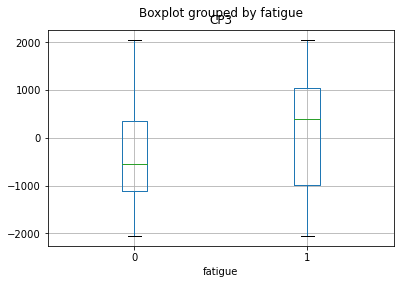

In [14]:
df_full.boxplot('CP3','fatigue')

##### Still need to create EEG specific visualization

### Normalizing the data

In [15]:
normalized_df_full=(df_full-df_full.min())/(df_full.max()-df_full.min())

In [16]:
normalized_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13232720 entries, 0 to 601519
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   T6       float64
 1   P3       float64
 2   TP7      float64
 3   O1       float64
 4   OZ       float64
 5   T4       float64
 6   T5       float64
 7   FC3      float64
 8   FCZ      float64
 9   CP3      float64
 10  fatigue  float64
dtypes: float64(11)
memory usage: 1.2 GB


In [17]:
normalized_df_full

T6        P3       TP7   O1        OZ        T4        T5  \
0       0.076923  0.365164  0.105263  0.0  0.624750  0.708934  0.000000   
1       0.000000  0.933623  0.000000  0.5  0.500008  0.809125  0.058824   
2       0.076923  0.360327  0.105263  0.0  0.623636  0.711666  0.000000   
3       0.000000  0.933410  0.000000  0.5  0.500008  0.807889  0.058824   
4       0.076923  0.357580  0.105263  0.0  0.622904  0.714580  0.000000   
...          ...       ...       ...  ...       ...       ...       ...   
601515  0.384615  0.202518  0.368421  0.5  0.500008  0.008133  0.411765   
601516  0.461538  0.695018  0.421053  0.5  0.597406  0.575616  0.705882   
601517  0.384615  0.201816  0.368421  0.5  0.500008  0.008499  0.411765   
601518  0.461538  0.695842  0.421053  0.5  0.598138  0.577264  0.705882   
601519  0.384615  0.203250  0.368421  0.5  0.500008  0.010040  0.411765   

             FC3       FCZ       CP3  fatigue  
0       0.605051  0.000000  0.543709      1.0  
1       0.500008  0.272727  0.854994      1.0  
2       0.604105  0.000000  0.541894      1.0  
3       0.500008  0.272727  0.855512      1.0  
4       0.603662  0.000000  0.542977      1.0  
...          ...       ...       ...      ...  
601515  0.500008  0.272727  0.596048      0.0  
601516  0.283604  0.272727  0.088777      0.0  
601517  0.500008  0.272727  0.596414      0.0  
601518  0.282200  0.272727  0.089952      0.0  
601519  0.500008  0.272727  0.598398      0.0  

[13232720 rows x 11 columns]

In [18]:
normalized_df_full_test=(df_full_test-df_full_test.min())/(df_full_test.max()-df_full_test.min())

In [19]:
normalized_df_full_test

T6        P3       TP7   O1        OZ        T4        T5  \
0       0.000000  0.783273  0.000000  1.0  0.801407  0.241352  1.000000   
1       0.666667  0.696677  1.000000  0.0  0.499977  0.678416  0.333333   
2       0.000000  0.781289  0.000000  1.0  0.800293  0.241047  1.000000   
3       0.666667  0.693426  1.000000  0.0  0.499977  0.677943  0.333333   
4       0.000000  0.780633  0.000000  1.0  0.800613  0.241291  1.000000   
...          ...       ...       ...  ...       ...       ...       ...   
601515  0.666667  0.163717  0.666667  0.0  0.499977  0.189700  0.000000   
601516  0.000000  0.253929  0.000000  1.0  0.433352  0.955032  0.666667   
601517  0.666667  0.161946  0.666667  0.0  0.499977  0.190097  0.000000   
601518  0.000000  0.253716  0.000000  1.0  0.434237  0.955413  0.666667   
601519  0.666667  0.161458  0.666667  0.0  0.499977  0.190982  0.000000   

             FC3   FCZ       CP3  fatigue  
0       0.568034  0.75  0.542809      1.0  
1       0.183929  0.00  0.062974      1.0  
2       0.564469  0.75  0.538369      1.0  
3       0.183794  0.00  0.061662      1.0  
4       0.562303  0.75  0.535637      1.0  
...          ...   ...       ...      ...  
601515  0.870408  0.25  0.144961      0.0  
601516  0.036375  0.75  0.559213      0.0  
601517  0.868986  0.25  0.145342      0.0  
601518  0.034051  0.75  0.558556      0.0  
601519  0.868422  0.25  0.144320      0.0  

[1203920 rows x 11 columns]

# Training the Algorithm

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
X_train = normalized_df_full.drop('fatigue',axis=1)

In [22]:
y_train = normalized_df_full['fatigue']

In [23]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)

## Classifier 

In [ ]:
classifier.fit(X_train,y_train)

## Classifier end

## Testing the Model

In [ ]:
X_test = normalized_df_full_test.drop('fatigue',axis=1)

In [ ]:
y_test = normalized_df_full_test['fatigue']

In [ ]:
y_predict = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(y_predict,y_test)

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(y_predict,y_test))

In [ ]:
cm